In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_excel('./data/data.xlsx')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Unnamed: 0')
data.index.name = None
data.head()

,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-01,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,434.334015,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-02,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.437988,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-03,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,430.010986,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-04,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.091003,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-05,23.237108,48.460758,0.802417,31.689501,36.953972,102.248108,131.25,14.895333,10.575768,17.599522,...,1.355960,3.471827,431.959991,1078.400024,13.949,888.599976,2.0885,535.099976,35.970001,2.325


In [3]:
pre = data.groupby([data.index.year, data.index.month]).agg(["first", "last"])

data_pct_m = pd.DataFrame(index = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values
                     , columns = data.columns)
for i in data.columns:
    data_pct_m[i] = ( (pre[i]['last'] - pre[i]['first']) / pre[i]['first'] ).values

print(data_pct_m.shape)
data_pct_m.head()

(72, 200)


,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-31,-0.081791,0.000669,-0.094944,-0.091236,0.009629,0.116513,-0.013155,-0.127046,-0.041632,0.092092,...,-0.053811,0.036291,-0.150960,0.045546,0.034643,-0.014983,-0.007164,-0.078675,-0.121690,-0.057127
2016-02-29,0.008137,-0.063328,0.074207,-0.038778,-0.072114,-0.070988,0.042826,-0.025439,-0.026946,-0.017185,...,0.110019,0.067139,0.173274,0.093980,0.039570,0.074701,0.037533,-0.011962,0.067362,-0.204926
2016-03-31,0.084154,0.050399,0.087939,0.025214,0.036366,0.038973,0.036074,0.233002,0.119783,0.038174,...,0.139653,0.181896,-0.042273,0.003170,0.049345,0.043265,0.018678,0.087809,0.114535,0.124569
2016-04-30,-0.148044,-0.098135,-0.012817,0.115583,-0.073564,0.015940,0.015022,0.014801,-0.075665,-0.028236,...,0.184284,0.211440,0.072634,0.056319,0.179675,0.132795,0.051905,0.115937,0.237836,0.090320
2016-05-31,0.072536,0.059713,0.306836,0.069590,0.056345,0.004821,-0.040158,-0.075474,0.057478,0.058622,...,0.061050,-0.112104,0.175958,-0.060383,-0.097644,-0.095945,-0.074904,-0.124953,0.087245,0.096135


In [4]:
rate = pd.read_csv('./data/rates.csv', sep=',')
rate = rate[['Дата', 'Цена']]
rate[['Day', 'Month', 'Year']] = rate['Дата'].str.split('.',expand=True)
rate['Date'] = rate['Day'] + '-' + rate['Month'] + '-' + rate['Year']
rate = rate.drop(['Дата', 'Day', 'Month', 'Year'], axis=1)
rate['Date'] = pd.to_datetime(rate['Date'], format='%d-%m-%Y')
rate = rate.set_index('Date')
rate.index.name = None
rate['Цена'] = rate['Цена'].str.replace(',', '.')
rate['Цена'] = rate['Цена'].astype(float) / 100
rate.rename(columns={'Цена': 'Rate'}, inplace=True)
rate.head()

,Rate
2021-12-01,0.00056
2021-11-01,0.00106
2021-10-01,0.00056
2021-09-01,0.00053
2021-08-01,0.00035


In [5]:
msci = pd.read_csv('./data/MSCI.csv', sep=',')
msci = msci[['Дата', 'Цена']]
msci[['Day', 'Month', 'Year']] = msci['Дата'].str.split('.',expand=True)
msci['Date'] = msci['Day'] + '-' + msci['Month'] + '-' + msci['Year']
msci = msci.drop(['Дата', 'Day', 'Month', 'Year'], axis=1)
msci['Date'] = pd.to_datetime(msci['Date'], format='%d-%m-%Y')
msci = msci.set_index('Date')
msci.index.name = None
msci['Цена'] = msci['Цена'].str.replace('.', '')
msci['Цена'] = msci['Цена'].str.replace(',', '.')
msci['Цена'] = msci['Цена'].astype(float)
msci.rename(columns={'Цена': 'MSCI'}, inplace=True)
msci.head()

,MSCI
2021-12-01,3231.73
2021-11-01,3101.80
2021-10-01,3174.73
2021-09-01,3006.60
2021-08-01,3141.35


In [6]:
pdata = data[:366]
pdata_pct = pdata.pct_change().dropna()
pdata_pct_m = data_pct_m[:12]

rate = rate.sort_index(ascending=True)
r_f = rate.iloc[12, 0]

msci = msci.sort_index(ascending=True)
msci_y = msci.iloc[:12, 0]

In [7]:
cov_m_start = pdata_pct_m.cov()
mu_start = pdata_pct_m.mean()

In [8]:
from pypfopt import EfficientFrontier

In [9]:
import matplotlib.pyplot as plt

Minimum Risk Portfolio

In [10]:
def get_ef_dots(mu, cov_m):
    ef = EfficientFrontier(mu, cov_m, solver='SCS')
    mu_min = min(i for i in mu if i > 0)
    target_returns = np.linspace(mu_min*1.01, mu.max()*0.99, 100)
    sigmas = []
    weights = []
    for target_return in target_returns:
        ef.efficient_return(target_return)
        weight = ef.clean_weights()
        weights.append(list(weight.values()))
        sigmas.append(ef.portfolio_performance()[1])
    cut = list(map(lambda i: i > np.diag(cov_m).min(), sigmas)).index(True)
    return [target_returns[cut:], sigmas[cut:], weights[cut:]]

In [11]:
def get_min_risk_portfolio(pdata_pct_m):
    mu = pdata_pct_m.mean()
    cov_m = pdata_pct_m.cov()
    ef_dots = get_ef_dots(mu, cov_m)
    #Min Risk portfolio
    min_risk = [ef_dots[0][0], ef_dots[1][0], ef_dots[2][0]]
    return ef_dots, min_risk

In [12]:
ww1, ww2 = get_min_risk_portfolio(pdata_pct_m)

C:\Users\kirik\anaconda3\Lib\site-packages\pypfopt\base_optimizer.py:556: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(objective_functions.portfolio_variance(new_weights, cov_matrix))
C:\Users\kirik\anaconda3\Lib\site-packages\cvxpy\atoms\elementwise\power.py:181: RuntimeWarning: invalid value encountered in power
  return np.power(values[0], float(self.p.value))


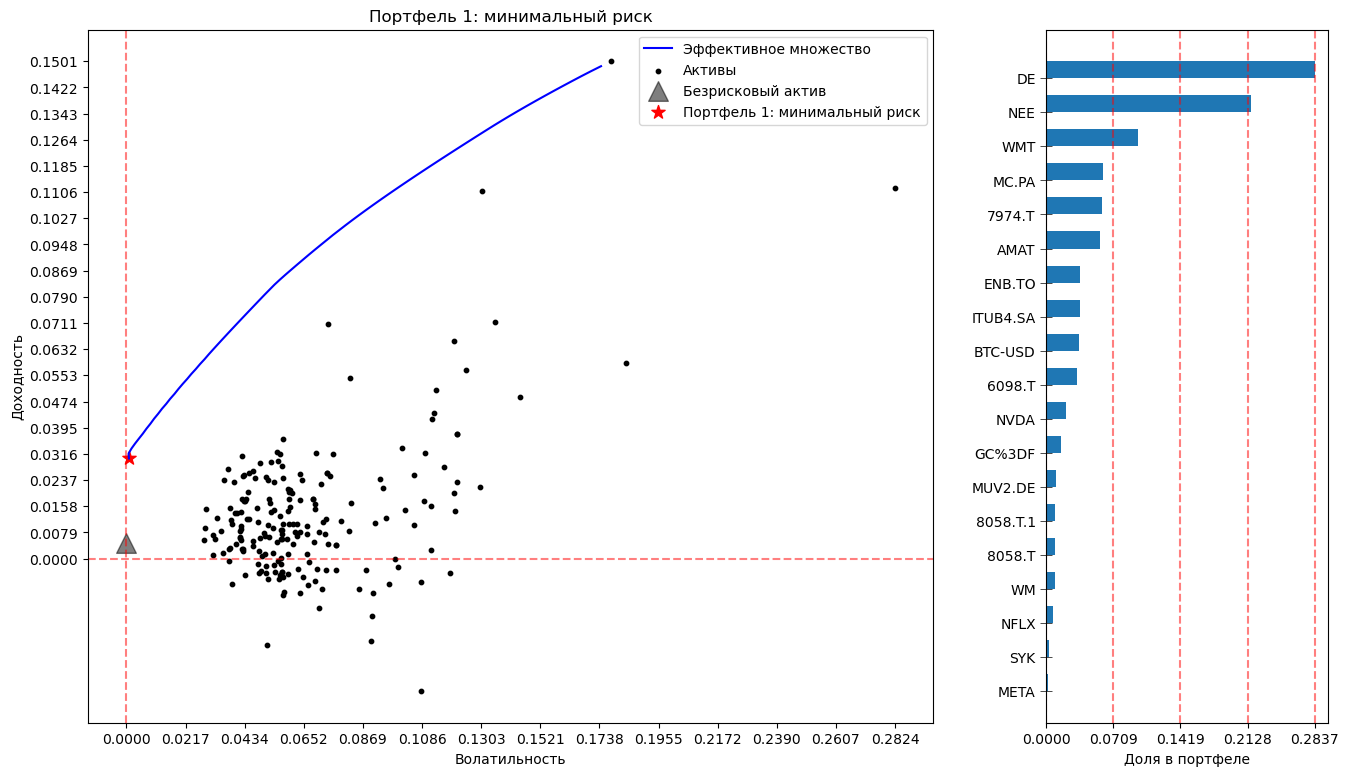

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier
ax1.plot(ww1[1], ww1[0], color='blue')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Min Risk portfolio
ax1.scatter(ww1[1][0], ww1[0][0], marker='*', color='red', s=100)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Портфель 1: минимальный риск'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 1: минимальный риск")

ax1.set_xticks(ticks=np.linspace(0, max(np.sqrt(np.diag(cov_m_start))), num=14))
ax1.set_yticks(ticks=np.linspace(0, max(mu_start), num=20))



portfolio = zip(ww2[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
portfolio.sort(key = lambda row: row[0])
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

ax2.barh(labels, values
         , height=0.5
         , align='edge')

ax2.tick_params(axis='y'
                , labelsize=10
                , direction='inout'
                , length=8
                , width=0.5)

ax2.set_xlabel("Доля в портфеле")
ax2.set_xticks(ticks=np.linspace(0, max(values), num=5))
ax2.axvline(x=np.linspace(0, max(values), num=5)[0], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[1], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[2], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[3], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[4], color='red', linestyle='--', alpha=0.5)



plt.show()

Max Sharpe Portfolio

In [14]:
def get_max_sharpe_portfolio(pdata_pct_m):
    mu = pdata_pct_m.mean()
    cov_m = pdata_pct_m.cov()
    ef_dots = get_ef_dots(mu, cov_m)
    #Max Sharpe portfolio
    sharpe_values = []
    for w in ef_dots[2]:
        sharpe_values.append( (w @ (mu.values - r_f)) / np.sqrt(w @ cov_m @ w) )
    max_sharpe = sharpe_values.index(max(sharpe_values))
    return ef_dots, [ef_dots[0][max_sharpe], ef_dots[1][max_sharpe], ef_dots[2][max_sharpe]]

In [15]:
ww1, ww3 = get_max_sharpe_portfolio(pdata_pct_m)

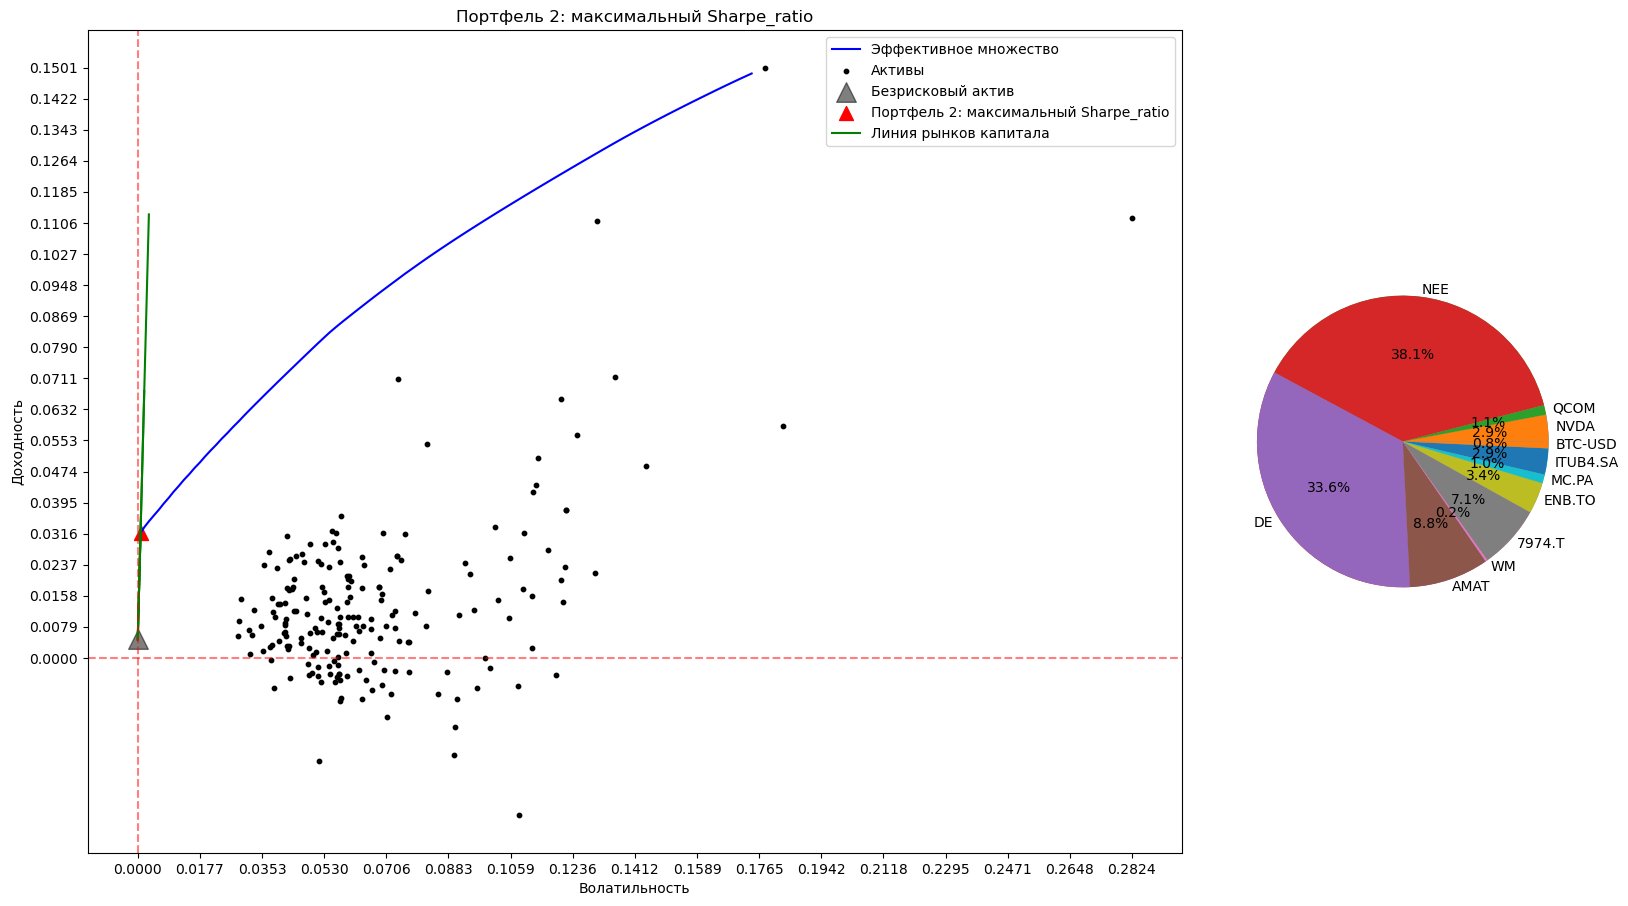

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier
ax1.plot(ww1[1], ww1[0], color='blue')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Max Sharpe ratio
ax1.scatter(ww3[1], ww3[0], marker="^", color='red', s=100)

#Efficiet Market Line
coefficients = np.polyfit([ww3[1], 0], [ww3[0], r_f], 1) 
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0, ww1[1][:4])
y_axis = polynomial(x_axis)
ax1.plot(x_axis, y_axis, color='green')

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Портфель 2: максимальный Sharpe_ratio'
           , 'Линия рынков капитала'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 2: максимальный Sharpe_ratio")

ax1.set_xticks(ticks=np.linspace(0, max(np.sqrt(np.diag(cov_m_start))), num=17))
ax1.set_yticks(ticks=np.linspace(0, max(mu_start), num=20))

#Portfolio bar

portfolio = zip(ww3[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

fig.tight_layout(pad=0.5)

wedges, autotexts = ax2.pie(values, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax2.pie(values
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , labeldistance=1.05)

plt.show()

Max Treynor Ratio Portfolio

Covariance matrix from median covariance and spearman correlation

In [17]:
def median_cov(pdata_pct_m):
    median_cov_m = []
    for col in pdata_pct_m.columns:
        median_cov_m.append(np.median( np.abs(pdata_pct_m[col] - np.median(pdata_pct_m[col])) ))
    return np.diag(median_cov_m)

def spearman_corr(pdata_pct_m):
    return pdata_pct_m.corr(method='spearman')

def median_cov_spearman_corr_matrix(pdata_pct_m):
    median_cov_matrix = median_cov(pdata_pct_m)
    spearman_corr_matrix = spearman_corr(pdata_pct_m)
    
    cov_max_tr = median_cov_matrix @ spearman_corr_matrix @ median_cov_matrix
    cov_max_tr.columns = pdata_pct_m.columns
    cov_max_tr.index = pdata_pct_m.columns
    return cov_max_tr

Expected returns as first moment from MLE

In [18]:
from scipy.stats import beta, dweibull, gamma, gumbel_r, lognorm, norm

In [19]:
#Maximum Likelihood estimation for first moment

def get_mom_from_mle(x, n=1):
 
    def beta_fit(x):
        a,b,c,d = beta.fit(x, method="MLE")
        mle = np.log(beta.pdf(x, a, b,c ,d)).sum()
        mom1 = beta.stats(a, b, c, d, moments='mvsk')[0]
        mom2 = beta.stats(a, b, c, d, moments='mvsk')[1]
        return [mle, mom1, mom2]

    def dweibull_fit(x):
        a,b,c = dweibull.fit(x, method="MLE")
        mle = np.log(dweibull.pdf(x, a, b,c )).sum()
        mom1 = dweibull.stats(a, b, c, moments='mvsk')[0]
        mom2 = dweibull.stats(a, b, c, moments='mvsk')[1]
        return [mle, mom1, mom2]

    def gamma_fit(x):
        a,b,c = gamma.fit(x, method="MLE")
        mle = np.log(gamma.pdf(x, a, b,c )).sum()
        mom1 = gamma.stats(a, b, c, moments='mvsk')[0]
        mom2 = gamma.stats(a, b, c, moments='mvsk')[1]
        return [mle, mom1, mom2]

    def gumbel_fit(x):
        a,b = gumbel_r.fit(x, method="MLE")
        mle = np.log(gumbel_r.pdf(x, a, b)).sum()
        mom1 = gumbel_r.stats(a, b, moments='mvsk')[0]
        mom2 = gumbel_r.stats(a, b, moments='mvsk')[1]
        return [mle, mom1, mom2]

    def lognorm_fit(x):
        a,b,c = lognorm.fit(x, method="MLE")
        mle = np.log(lognorm.pdf(x, a, b,c)).sum()
        mom1 = lognorm.stats(a, b, c, moments='mvsk')[0]
        mom2 = lognorm.stats(a, b, c, moments='mvsk')[1]
        return [mle, mom1, mom2]

    def norm_fit(x):
        a,b = norm.fit(x, method="MLE")
        mle = np.log(norm.pdf(x, a, b)).sum()
        mom1 = norm.stats(a, b, moments='mvsk')[0]
        mom2 = norm.stats(a, b, moments='mvsk')[1]
        return [mle, mom1, mom2]
    
    result = [beta_fit(x), dweibull_fit(x), gamma_fit(x), gumbel_fit(x), lognorm_fit(x), norm_fit(x)]
    result = max(result, key=lambda x: x[0])
    if n == 1:
        return result[1]
    if n == 2:
        return result[2]

In [20]:
def exp_ret_from_mle(pdata_pct_m):
    exp_ret_from_mle_vector = []
    for col in pdata_pct_m.columns:
        data = pdata_pct_m[col].values
        exp_ret_from_mle_vector.append( get_mom_from_mle(data, n=1) )
    exp_ret_from_mle_vector = pd.Series(exp_ret_from_mle_vector, index=pdata_pct_m.columns)
    return exp_ret_from_mle_vector

In [21]:
def get_asset_betas(pdata_pct_m, msci_y):
    betas = []
    for col in pdata_pct_m.columns:
        betas.append( np.cov(msci_y.values, pdata_pct_m[col], ddof=0)[0][1] / np.var(msci_y) )
    return np.array(betas)

In [22]:
def get_max_treynor_portfolio(pdata_pct_m, msci_y):
    mu = exp_ret_from_mle(pdata_pct_m)
    cov_m = median_cov_spearman_corr_matrix(pdata_pct_m)
    ef_dots = get_ef_dots(mu, cov_m)
    #Max Treynor portfolio
    treynor_values = []
    betas = get_asset_betas(pdata_pct_m, msci_y)
    for w in ef_dots[2]:
        treynor_values.append( (mu - r_f) @ w / (w @ betas.T) )
    max_treynor = treynor_values.index(max(treynor_values))
    return ef_dots, [ef_dots[0][max_treynor], ef_dots[1][max_treynor], ef_dots[2][max_treynor]], mu, cov_m

In [23]:
ww4, ww5, mu_m_tr, cov_m_tr = get_max_treynor_portfolio(pdata_pct_m, msci_y)

C:\Users\kirik\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\kirik\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\kirik\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


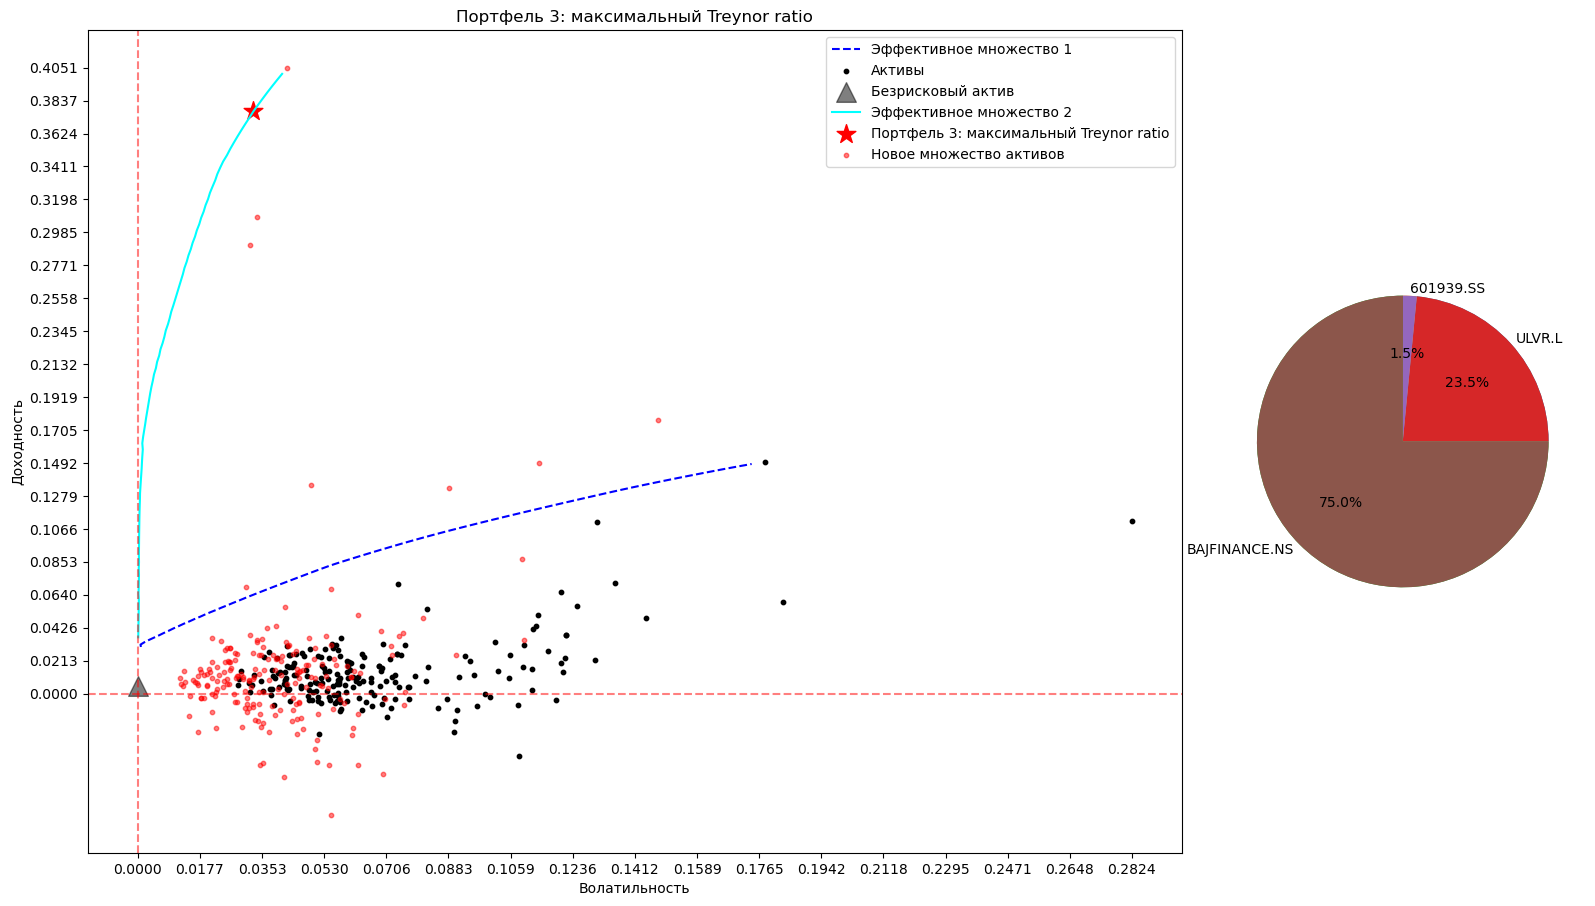

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww4[1], ww4[0], color='aqua')

#Max Treynor ratio portfolio
ax1.scatter(ww5[1], ww5[0], marker='*', color='red', s=200)

#New asset returns and std
ax1.scatter(np.sqrt(np.diag(cov_m_tr)), mu_m_tr, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 2'
           , 'Портфель 3: максимальный Treynor ratio'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 3: максимальный Treynor ratio")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(np.sqrt(np.diag(cov_m_tr))), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=17))

ax1.set_yticks(ticks=np.linspace(0, max(mu_m_tr), num=20))


#Portfolio bar

portfolio = zip(ww5[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

fig.tight_layout(pad=0.5)

wedges, autotexts = ax2.pie(values, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax2.pie(values
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , labeldistance=1.05)


plt.show()

Maximum Sortino Portfolio

In [25]:
def capm_exp_ret(pdata_pct_m, msci_y, r_f):
    mu = []
    for i, col in enumerate(pdata_pct_m.columns):
        beta_reg, alpha_reg = np.polyfit(x = pdata_pct_m[col].values[1:] , y = msci_y.pct_change().values[1:] , deg = 1)
        mu.append(alpha_reg - r_f + beta_reg * (msci_y.pct_change().mean() - r_f))
    return pd.Series(mu, index=pdata_pct_m.columns)

In [26]:
def semi_cov_matrix(pdata_pct_m, r_f):
    semi_cov = []
    for col in pdata_pct_m.columns:
        semi_cov.append((np.minimum(pdata_pct_m[col] - r_f, 0)**2).mean())
    return np.diag(semi_cov)

def kendall_corr(pdata_pct_m):
    return pdata_pct_m.corr(method='kendall')

def semi_cov_kendall_corr_matrix(pdata_pct_m, r_f):
    cov_m = semi_cov_matrix(pdata_pct_m, r_f) @ kendall_corr(pdata_pct_m) @ semi_cov_matrix(pdata_pct_m, r_f)
    cov_m.index = pdata_pct_m.columns
    cov_m.columns = pdata_pct_m.columns
    return cov_m

In [27]:
def get_max_sortino_portfolio(pdata_pct_m, msci_y, r_f):
    mu = capm_exp_ret(pdata_pct_m, msci_y, r_f)
    cov_m = semi_cov_kendall_corr_matrix(pdata_pct_m, r_f)
    ef_dots = get_ef_dots(mu, cov_m)
    #Max Sortino portfolio
    sortino_values = []
    for w in ef_dots[2]:
        sortino_values.append( (w @ (mu - r_f)) / np.sqrt(w @ cov_m @ w) )
    max_sortino = sortino_values.index(max(sortino_values))
    return ef_dots, [ef_dots[0][max_sortino], ef_dots[1][max_sortino], ef_dots[2][max_sortino]], mu, cov_m

In [28]:
ww6, ww7, mu_m_so, cov_m_so = get_max_sortino_portfolio(pdata_pct_m, msci_y, r_f)

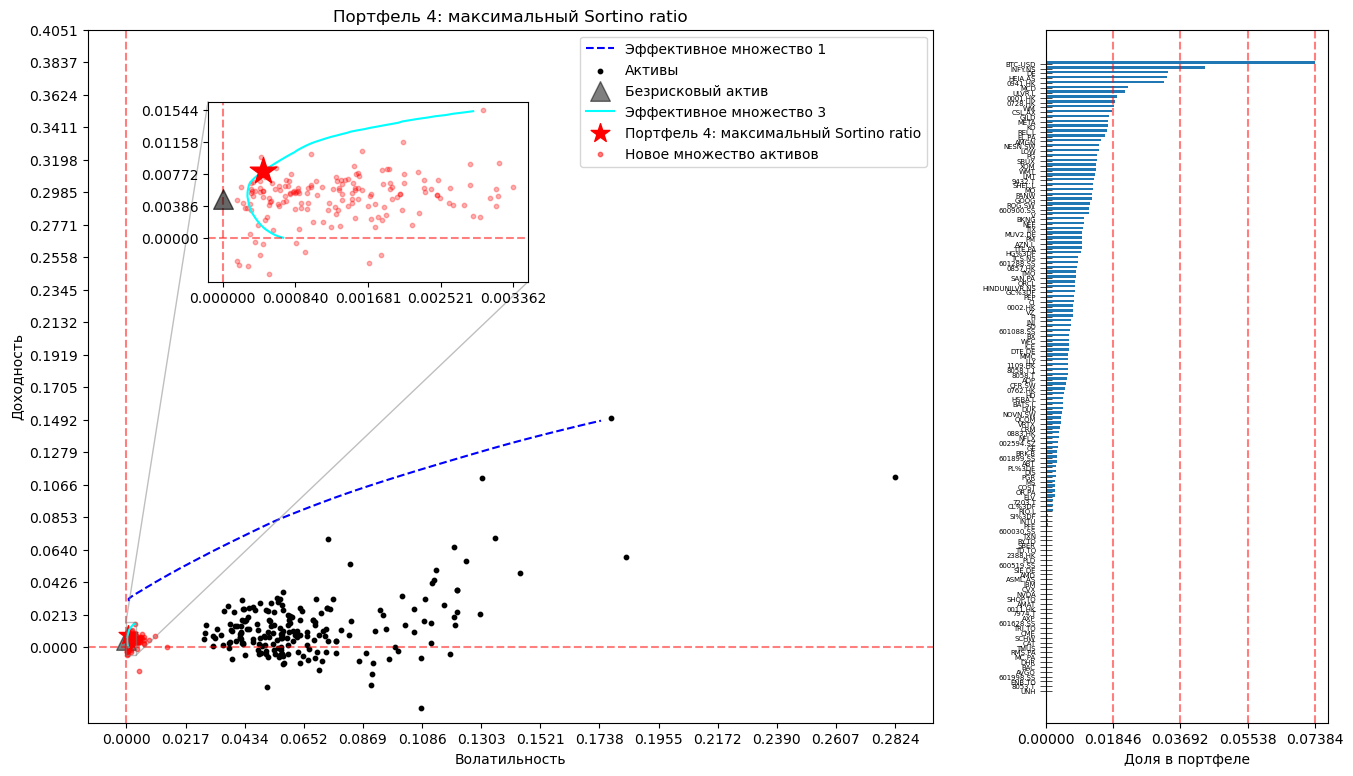

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww6[1], ww6[0], color='aqua')

#Max Sortino ratio portfolio
ax1.scatter(ww7[1], ww7[0], marker='*', color='red', s=200)

#New asset returns and std
ax1.scatter(np.sqrt(np.diag(cov_m_so)), mu_m_so, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 3'
           , 'Портфель 4: максимальный Sortino ratio'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 4: максимальный Sortino ratio")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(np.sqrt(np.diag(cov_m_so))), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=14))

ax1.set_yticks(ticks=np.linspace(0, max( 
                                        max(mu_m_tr) , max(mu_start) )
                                , num=20))


#Portfolio bar
portfolio = zip(ww7[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
portfolio.sort(key = lambda row: row[0])
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

ax2.barh(labels, values
         , height=0.5
         , align='edge')

ax2.tick_params(axis='y'
                , labelsize=5
                , direction='inout'
                , length=8
                , width=0.5)

ax2.set_xlabel("Доля в портфеле")
ax2.set_xticks(ticks=np.linspace(0, max(values), num=5))
ax2.axvline(x=np.linspace(0, max(values), num=5)[0], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[1], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[2], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[3], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[4], color='red', linestyle='--', alpha=0.5)
#clear_output(wait=True)



#Sub plot
sub_axes = plt.axes([.20, .6, .2, .2]) 

#Efficient frontier 2
sub_axes.plot(ww6[1], ww6[0], color='aqua') 

#Assets 2
zipped = zip(np.sqrt(np.diag(cov_m_so)), mu_m_so)
zipped = sorted(zipped, key=lambda x: x[0])
z1, z2 = zip(*zipped)
z1, z2 = z1[:-30], z2[:-30]
z1, z2 = z1[3:], z2[3:]
sub_axes.scatter(z1, z2, color='red', s=10, alpha=0.3)

#X,Y axes
sub_axes.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
sub_axes.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#Max Sortino ratio portfolio
sub_axes.scatter(ww7[1], ww7[0], marker='*', color='red', s=400, zorder=10)

#Risk Free asset
sub_axes.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.6, zorder=10)

#Ticks
sub_axes.set_xticks(ticks=np.linspace(0, max(z1), num=5))

sub_axes.set_yticks(ticks=np.linspace(0, max(z2), num=5))

ax1.indicate_inset_zoom(sub_axes)

plt.show()

Maximum Stuzer Ratio Portfolio

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from IPython.display import clear_output
from tqdm import tqdm

In [31]:
def arma_exp_ret(pdata, pdata_pct):
    mu = []
    for i in tqdm(pdata_pct.columns):
        model = ARIMA(pdata_pct[i], order=(9, 0, 7), freq='D')
        model_fit = model.fit()
        start = len(pdata_pct[i])
        end = start + 30
        predictions = model_fit.predict(start=start, end=end)
        clear_output(wait=True)
        prev_v = pdata[i][-1]
        for j in predictions:
            if j != 0:
                prev_v = (j + 1) * prev_v
            else:
                pass
        mu.append((prev_v - pdata[i][-1]) / pdata[i][-1])
    return pd.Series(mu, index=pdata_pct.columns)

In [32]:
def var_from_mle(pdata_pct_m):
    var = []
    for col in pdata_pct_m.columns:
        x = pdata_pct_m[col].values
        var.append( get_mom_from_mle(x, n=2) )
    return np.diag(var)

def arch_copula_corr(p=0):
    archimedian_cor= np.loadtxt('correlation_analysis/intermediate_data/archimedian/archimedian_cors%s.gz' %p, delimiter=',')
    return archimedian_cor

def var_mle_arch_copula_corr_matrix(pdata_pct_m, p=0):
    var = var_from_mle(pdata_pct_m)
    corr_m = arch_copula_corr(p=p)
    cov_m = pd.DataFrame(var @ corr_m @ var)
    cov_m.index = pdata_pct_m.columns
    cov_m.columns = pdata_pct_m.columns
    return cov_m

In [33]:
from scipy.optimize import minimize

In [34]:
def get_max_stuzer_portfolio(pdata, pdata_pct, pdata_pct_m, r_f, p=0):
    mu = arma_exp_ret(pdata, pdata_pct)
    cov_m = var_mle_arch_copula_corr_matrix(pdata_pct_m, p=0)
    ef_dots = get_ef_dots(mu, cov_m)
    #Max Stuzer Portfolio
    def st_f(I, mu, r_f, w):
        return -np.log(np.mean(np.exp(I * w @ (mu - r_f))))
    stuzer_values = []
    for w in ef_dots[2]:
        res = minimize(lambda I: -st_f(I, mu, r_f, w), x0=1.0, method='BFGS')
        I_st = res.x[0]
        stuzer_values.append( (w @ (mu - r_f)) / np.sqrt(w @ cov_m @ w) * np.sqrt(2 * abs(I_st)) )
    max_stuzer = stuzer_values.index(max(stuzer_values))
    clear_output(wait=True)
    return ef_dots, [ef_dots[0][max_stuzer], ef_dots[1][max_stuzer], ef_dots[2][max_stuzer]], mu, cov_m

In [35]:
ww8, ww9, mu_m_st, cov_m_st = get_max_stuzer_portfolio(pdata, pdata_pct, pdata_pct_m, r_f, p=0)
clear_output(wait=True)

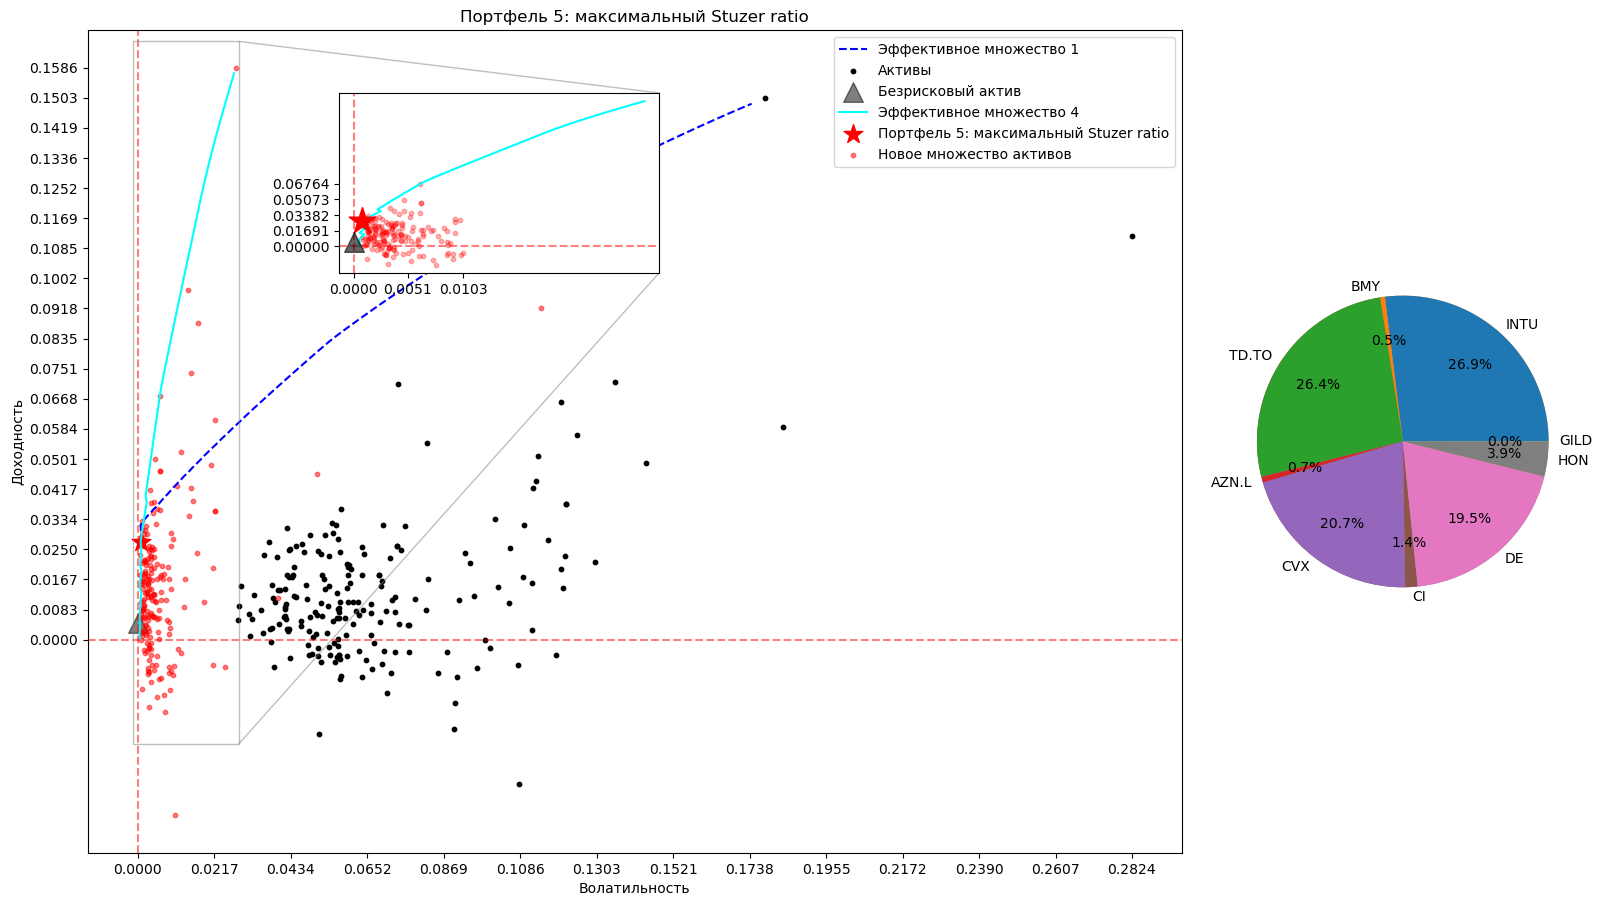

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww8[1], ww8[0], color='aqua')

#Max Sortino ratio portfolio
ax1.scatter(ww9[1], ww9[0], marker='*', color='red', s=200)

#New asset returns and std
cov_m_st_copy = np.sqrt(np.diag(cov_m_st)).copy()
mu_m_st_copy = mu_m_st.copy()
for i in range(4):
    ind = np.where(cov_m_st_copy == max(cov_m_st_copy))[0][0]
    cov_m_st_copy = np.delete(cov_m_st_copy, ind)
    mu_m_st_copy = np.delete(mu_m_st_copy, ind)
ax1.scatter(cov_m_st_copy, mu_m_st_copy, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 4'
           , 'Портфель 5: максимальный Stuzer ratio'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 5: максимальный Stuzer ratio")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(cov_m_st_copy), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=14))

ax1.set_yticks(ticks=np.linspace(0, max( 
                                        max(mu_m_st_copy) , max(mu_start) )
                                , num=20))


#Portfolio bar
portfolio = zip(ww9[2], mu_start.index)
portfolio_s = []
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
for i,j in zip(sorted(portfolio, reverse=False), sorted(portfolio, reverse=True)):
    portfolio_s.append(i)
    portfolio_s.append(j)
portfolio = portfolio_s[:len(portfolio)]
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

fig.tight_layout(pad=0.5)

wedges, autotexts = ax2.pie(values, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax2.pie(values
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.7
       , labeldistance=1.07)
#clear_output(wait=True)

#Sub plot
sub_axes = plt.axes([.21, .7, .2, .2]) 

#Efficient frontier 2
sub_axes.plot(ww8[1], ww8[0], color='aqua') 

#Assets 2
zipped = zip(np.sqrt(np.diag(cov_m_st)), mu_m_st)
zipped = sorted(zipped, key=lambda x: x[0])
z1, z2 = zip(*zipped)
z1, z2 = z1[:-30], z2[:-30]
z1, z2 = z1[3:], z2[3:]
sub_axes.scatter(z1, z2, color='red', s=10, alpha=0.3)

#X,Y axes
sub_axes.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
sub_axes.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#Max Sortino ratio portfolio
sub_axes.scatter(ww9[1], ww9[0], marker='*', color='red', s=400, zorder=10)

#Risk Free asset
sub_axes.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.6, zorder=10)

#Ticks
sub_axes.set_xticks(ticks=np.linspace(0, max(z1), num=3).round(4))

sub_axes.set_yticks(ticks=np.linspace(0, max(z2), num=5))

ax1.indicate_inset_zoom(sub_axes)

plt.show()

Min VaR Portfolio (delta-norm method)

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [38]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, preq_len):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.preq_len = preq_len
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h0=None, c0=None):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = out[:, -30:, :]
        out = self.fc(out)
        return out

In [39]:
def eval_lstm_model():
    input_size = 200
    hidden_size = 256
    num_layers = 2
    output_size = 200
    preq_len = 30
    
    model = LSTMModel(input_size, hidden_size, num_layers, input_size, preq_len).to(device)
    model.load_state_dict(torch.load('models/lstm_predict.pth', weights_only=True))
    model.eval()
    return model

def lstm_exp_ret(pdata_pct):
    model = eval_lstm_model()
    clear_output(wait=True)
    pre = np.array([pdata_pct.values.astype(np.float32)])
    predicted = model(torch.from_numpy(pre))
    predicted = predicted.detach().numpy()
    predicted = predicted.reshape(predicted.shape[1], predicted.shape[2])
    predicted = pd.DataFrame(predicted)
    predicted = predicted.mean()
    predicted.index = pdata_pct.columns
    return predicted

In [40]:
from sklearn.neighbors import KernelDensity

In [41]:
def var_from_kde(pdata_pct):
    var = []
    for col in pdata_pct.columns:
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pd.DataFrame(pdata_pct[col]))
        samples = kde.sample(n_samples=1000)
        var_col = pd.Series([i[0] for i in samples]).var()
        var.append(var_col)
    return np.diag(var)

def glasso_corr(p=0):
    glasso_cor = np.loadtxt('correlation_analysis/intermediate_data/glasso_cors/glasso_cors%s.gz' %p, delimiter=',')
    return glasso_cor

def var_kde_glasso_corr_matrix(pdata_pct_m, p=0):
    var = var_from_kde(pdata_pct_m)
    corr_m = glasso_corr(p=p)
    cov_m = pd.DataFrame(var @ corr_m @ var)
    cov_m.index = pdata_pct_m.columns
    cov_m.columns = pdata_pct_m.columns
    return cov_m

In [42]:
def get_min_var_portfolio(pdata, pdata_pct, pdata_pct_m, p=0, alpha=0.95, days=30):
    mu = lstm_exp_ret(pdata_pct)
    cov_m = var_kde_glasso_corr_matrix(pdata_pct_m, p=0)
    ef_dots = get_ef_dots(mu, cov_m)
    value_at_risk = []
    for w in ef_dots[2]:
        portfolio_ret = w @ mu
        portfolio_vol = np.sqrt(w @ cov_m @ w )
        var = abs((portfolio_ret * days - abs(norm.ppf(1-alpha)) * portfolio_vol * np.sqrt(days)))
        value_at_risk.append( var )
    min_var = value_at_risk.index(min(value_at_risk))
    return ef_dots, [ef_dots[0][min_var], ef_dots[1][min_var], ef_dots[2][min_var]], mu, cov_m, value_at_risk

In [43]:
ww10, ww11, mu_var, cov_var, vars_p = get_min_var_portfolio(pdata_pct, pdata_pct, pdata_pct_m, p=0, alpha=0.95, days=30)
clear_output(wait=True)

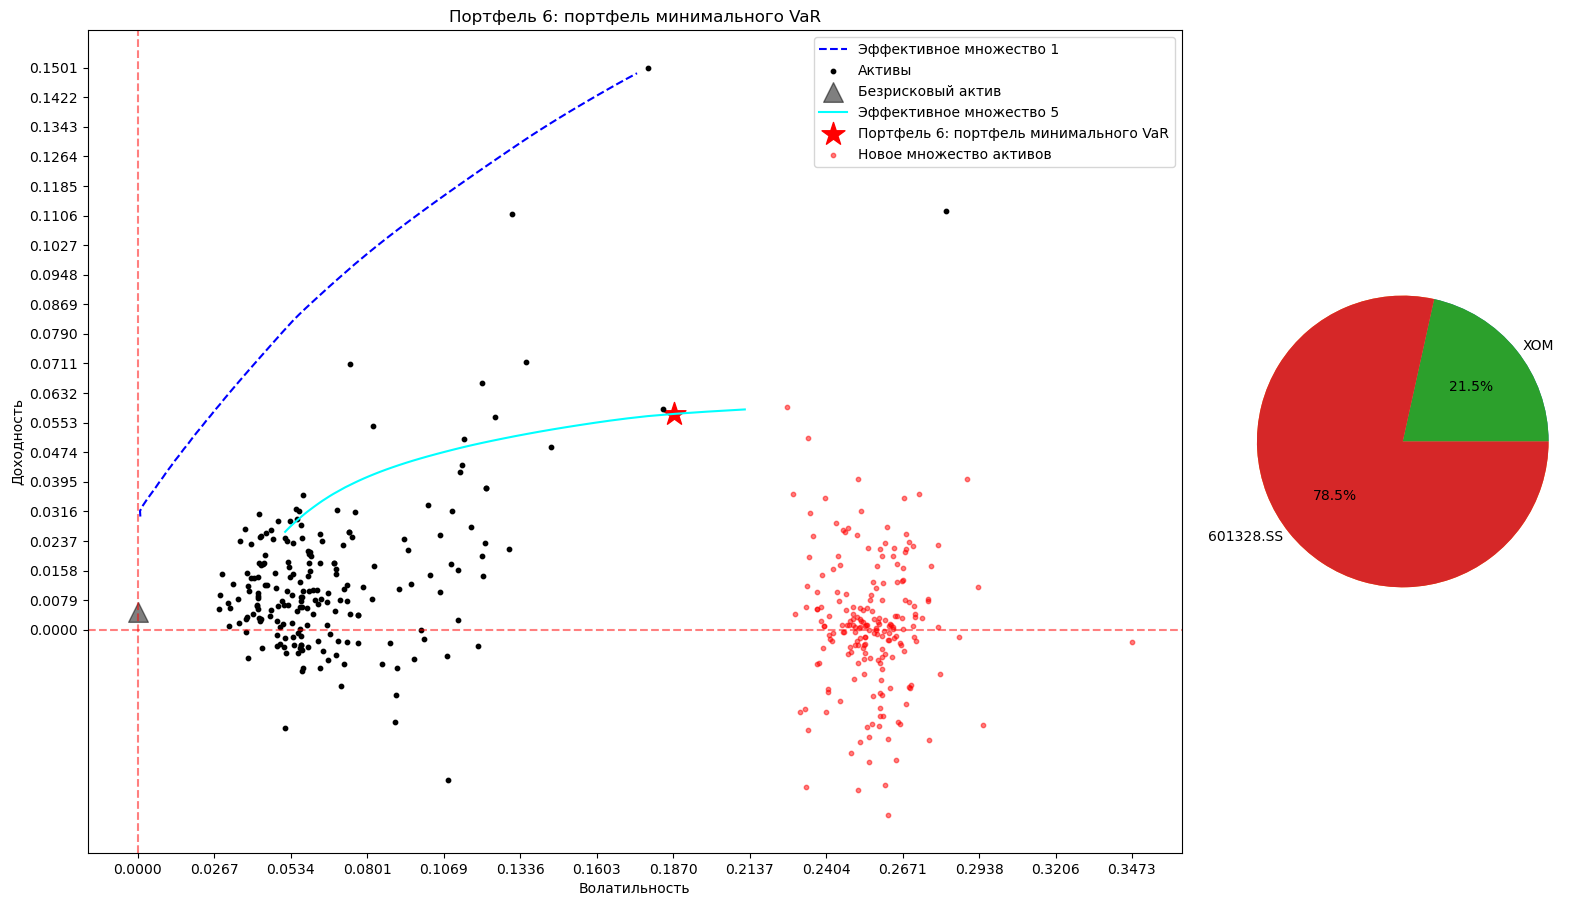

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww10[1], ww10[0], color='aqua')

#Min VaR portfolio
ax1.scatter(ww11[1], ww11[0], marker='*', color='red', s=300, zorder=-1)
ax1.scatter(np.sqrt(np.diag(cov_var)), mu_var, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 5'
           , 'Портфель 6: портфель минимального VaR'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 6: портфель минимального VaR")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(np.sqrt(np.diag(cov_var))), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=14))

ax1.set_yticks(ticks=np.linspace(0, max( 
                                        max(mu_var) , max(mu_start) )
                                , num=20))


#clear_output(wait=True)

#Portfolio bar

portfolio = zip(ww11[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

fig.tight_layout(pad=0.5)

wedges, autotexts = ax2.pie(values, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax2.pie(values
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , labeldistance=1.05)


plt.show()

Minimum CVaR Portfolio (historical modelling)

In [45]:
class CNNTimeSeriesForecaster(nn.Module):
    def __init__(self, input_size=365, output_size=30):
        super(CNNTimeSeriesForecaster, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Рассчитываем размер после пулинга
        self.flatten_size = 128 * (input_size // 8)
        
        self.fc1 = nn.Linear(self.flatten_size, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(256, output_size)
    
    def forward(self, x):
        x = x.unsqueeze(1)
        
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        
        return x

In [46]:
def eval_cnn_model(index):
    model = CNNTimeSeriesForecaster(input_size=365, output_size=30).to(device)
    model.load_state_dict(torch.load('models/cnn_models/cnn%s.pth' %index, weights_only=True))
    model.eval()
    return model

def cnn_asset_exp_ret(index, passet_returns):
    model = eval_cnn_model(index)
    clear_output(wait=True)
    pre = np.array([passet_returns.values.astype(np.float32)])
    predicted = model(torch.from_numpy(pre))
    predicted = predicted.detach().numpy()[0]
    return predicted[-1]

def cnn_exp_ret(pdata_pct):
    mu = []
    for index, i in enumerate(pdata_pct.columns):
        mu.append(cnn_asset_exp_ret(index, pdata_pct[i]))
    return pd.Series(mu, index=pdata_pct.columns)

In [47]:
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler

In [48]:
def var_from_garch(pdata_pct):
    var = []
    for col in pdata_pct.columns:
        model = arch_model(pdata_pct[col], vol='Garch', p=1, q=1)
        results = model.fit(update_freq=5)
        forecast = results.forecast(horizon=30)
        var.append(np.sqrt(forecast.variance.values.sum()))
        clear_output(wait=True)
    return var

def kpca_corr(p=0):
    kpca_cor = np.loadtxt('correlation_analysis/intermediate_data/kpca/X_kcpa_copula_cor_large_list2%s.gz' %p, delimiter=',')
    scaller = MinMaxScaler(feature_range=(-1, 1))
    kpca_cor = scaller.fit_transform(kpca_cor)
    return np.corrcoef(kpca_cor)

def var_garch_kpca_corr_matrix(pdata_pct_m, p=0):
    var = var_from_garch(pdata_pct)
    corr_m = kpca_corr(p=p)
    cov_m = pd.DataFrame(np.diag(var) @ corr_m @ np.diag(var))
    cov_m.index = pdata_pct_m.columns
    cov_m.columns = pdata_pct_m.columns
    return cov_m

In [50]:
def get_min_cvar_portfolio(pdata_pct, p=1, alpha=0.95):
    mu = cnn_exp_ret(pdata_pct)
    cov_m = var_garch_kpca_corr_matrix(pdata_pct_m, p=p)
    ef_dots = get_ef_dots(mu, cov_m)
    var_p = []
    cvar_p = []
    for w in ef_dots[2]:
        portfolio_ret = pdata_pct @ w
        var_level = int((1 - alpha) * len(mu))
        sorted_ret = np.sort(portfolio_ret)
        var = -sorted_ret[var_level]
        cvar = -np.mean(sorted_ret[:var_level])
        var_p.append(var)
        cvar_p.append(cvar)
    min_cvar = cvar_p.index(min(cvar_p))
    return ef_dots, [ef_dots[0][min_cvar], ef_dots[1][min_cvar], ef_dots[2][min_cvar]], mu, cov_m, cvar_p

In [51]:
ww12, ww13, mu_cvar, cov_cvar, cvars_p = get_min_cvar_portfolio(pdata_pct, p=1, alpha=0.95)
clear_output(wait=True)

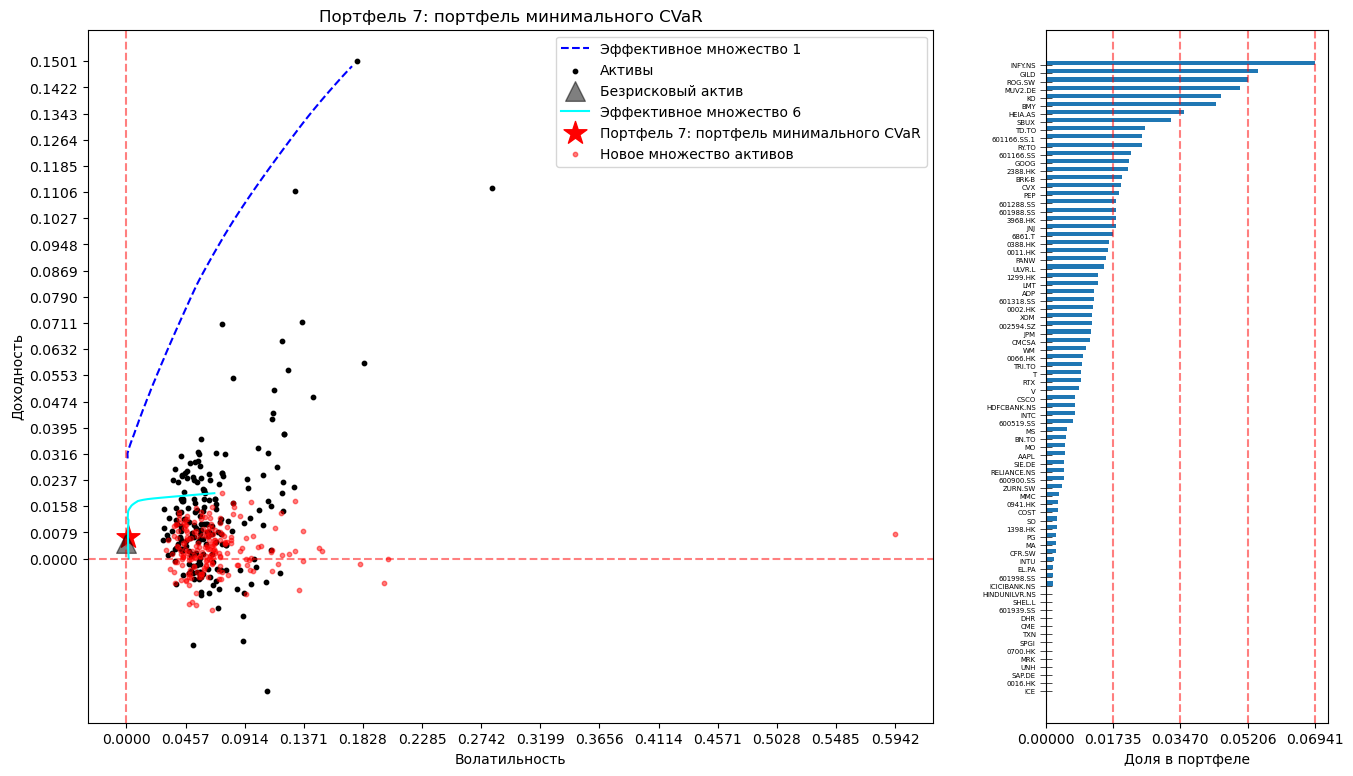

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww12[1], ww12[0], color='aqua')

#Min VaR portfolio
ax1.scatter(ww13[1], ww13[0], marker='*', color='red', s=300, zorder=-1)
ax1.scatter(np.sqrt(np.diag(cov_cvar)), mu_cvar, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 6'
           , 'Портфель 7: портфель минимального CVaR'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 7: портфель минимального CVaR")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(np.sqrt(np.diag(cov_cvar))), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=14))

ax1.set_yticks(ticks=np.linspace(0, max( 
                                        max(mu_cvar) , max(mu_start) )
                                , num=20))


#clear_output(wait=True)

#Portfolio bar
portfolio = zip(ww13[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
portfolio.sort(key = lambda row: row[0])
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

ax2.barh(labels, values
         , height=0.5
         , align='edge')

ax2.tick_params(axis='y'
                , labelsize=5
                , direction='inout'
                , length=8
                , width=0.5)

ax2.set_xlabel("Доля в портфеле")
ax2.set_xticks(ticks=np.linspace(0, max(values), num=5))
ax2.axvline(x=np.linspace(0, max(values), num=5)[0], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[1], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[2], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[3], color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=np.linspace(0, max(values), num=5)[4], color='red', linestyle='--', alpha=0.5)
#clear_output(wait=True)


plt.show()

Maximum r/CVaR Portfolio (Monte Carlo modelling)

In [53]:
from xgboost import XGBRegressor

In [54]:
def xgboost_exp_ret(pdata):
    mu = []
    for i in pdata.columns:
        X_train = np.array([pdata[i].values[:-30]])
        y_train = np.array([pdata[i].values[-30:]])
        X_test = np.array([pdata[i].values[30:]])
        
        model = XGBRegressor(n_estimators=100, learning_rate=0.1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mu.append((y_pred[0][-1] - X_test[0][-1]) / X_test[0][-1])
    return pd.Series(mu, index=pdata.columns) * 100

In [55]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

In [57]:
def var_from_lgbm(pdata):
    var = []
    preds = []
    
    def create_ds(data, ws, h):
        X, y = [], []
        for i in range(len(data) - ws - h + 1):
            X.append(data[i:i + ws])
            y.append(data[i + ws:i + ws + h])
        return np.array(X), np.array(y)
    
    for i in pdata.columns:
        X, y = create_ds(pdata[i].values, ws=60, h=30)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = LGBMRegressor(objective='regression'
                             , metric='rmse'
                             , boosting_type='gbdt'
                             , num_leaves=31
                             , learning_rate=0.01
                             , n_estimators=1000
                             , verbose=-1)

        model.fit(X_train, y_train[:, 0], eval_set=[(X_train, y_train[:, 0]),
                                                   (X_test, y_test[:, 0])])
        pred = model.predict(X_test)
        var.append(np.var(pd.Series(pred).pct_change()))
    clear_output(wait=True)   
    return np.array(var) * 1000

def encoder_corr(p=1):
    x = np.loadtxt('correlation_analysis/intermediate_data/decoder/X_encoded_train_copula_large_list%s.gz' %p, delimiter=',')
    return np.corrcoef(x)

def var_lgbm_encoder_corr(pdata, p=1):
    var = var_from_lgbm(pdata)
    corr_m = encoder_corr(p=p)
    cov_m = pd.DataFrame(np.diag(var) @ corr_m @ np.diag(var))
    cov_m.index = pdata.columns
    cov_m.columns = pdata.columns
    return cov_m

In [58]:
def get_r_cvar_portfolio(pdata, predicted_days=30, n_sim=1000, mu=None, sigma=None, corr_matrix=None, weight=[]):
    n_assets = pdata.shape[1]
    history_days = pdata.shape[0]
    predicted_days = predicted_days
    total_days = history_days + predicted_days
    n_sim = n_sim
    
    if mu is None:
        mu = pdata.mean().values
    if sigma is None:    
        sigma = np.diag(pdata.cov())
    if corr_matrix is None:
        corr_matrix = pdata.corr()
        
    theta = sigma / (2 * mu)
    
    S0 = pdata.values
    L = np.linalg.cholesky(corr_matrix)
    dt = 1/history_days
    sqrt_dt = np.sqrt(dt)
    
    paths = np.zeros((n_sim, total_days, n_assets))
    paths[:, :history_days, :] = S0
    
    for i in range(n_sim):
        Z = np.random.normal(0, 1, size=(predicted_days, n_assets))
        corr_Z = Z @ L.T

        for t in range(history_days, total_days):
            for k in range(n_assets):
                drift = theta[k] * (mu[k] - paths[i, t, k]) * dt
                diffusion = sigma[k] * sqrt_dt * corr_Z[t-history_days, k]
                paths[i, t, k] = paths[i, t-1, k] + drift + diffusion
                
    net_wealths = []
    for p in range(len(paths)):
        period_wealths = [sum((np.array(weight) * 1000000) / paths[p][-31:][0])]
        p0 = [paths[p][-31:][0]]
        qnt0 = ((np.array(weight) * 1000000) / paths[p][-31:][0] ).astype(int)
        for day in range(31):
            p1 = paths[p][-31:][day]
            w1 = sum(qnt0 * p1)
            period_wealths.append(w1)
        net_wealths.append(period_wealths)
        
    cvars = []
    for i in range(len(net_wealths)):
        cvar = np.mean(np.sort((np.array(net_wealths[i][1:]) / 1000000) - 1)[:3])
        cvars.append(cvar)
        
    pseudo_portfolio_returns = []
    for i in range(len(net_wealths)):
        pseudo_portfolio_returns.append(net_wealths[i][-1] / 1000000 * 100 - 100)
        
    return np.mean(pseudo_portfolio_returns), np.mean(cvars)

In [60]:
def get_max_r_cvar_portfolio(pdata, p=1):
    mu = xgboost_exp_ret(pdata)
    cov_m = var_lgbm_encoder_corr(pdata, p=p)
    ef_dots = get_ef_dots(mu, cov_m)
    pseudo_returns = []
    pseudo_cvars = []
    pseudo_r_cvar = []
    pseudo_r_cvar_all = []
    for w in ef_dots[2]:
        pseudo_ret, pseudo_cvar = get_r_cvar_portfolio(pdata
                                                       , predicted_days=30
                                                       , n_sim=1000
                                                       , mu=None
                                                       , sigma=None
                                                       , corr_matrix=None
                                                       , weight=w)
        pseudo_returns.append(pseudo_ret)
        pseudo_cvars.append(pseudo_cvar)
        pseudo_r_cvar.append(pseudo_ret / -pseudo_cvar)
        pseudo_r_cvar_all.append([pseudo_ret, pseudo_cvar])
    max_r_cvar = pseudo_r_cvar.index(max(pseudo_r_cvar))
    return ef_dots, [ef_dots[0][max_r_cvar], ef_dots[1][max_r_cvar], ef_dots[2][max_r_cvar]], mu, cov_m, pseudo_r_cvar, pseudo_r_cvar_all

In [72]:
ww14, ww15, mu_rcvar, cov_rcvar, rcvars, rcvars_all = get_max_r_cvar_portfolio(pdata, p=0)
clear_output(wait=True)

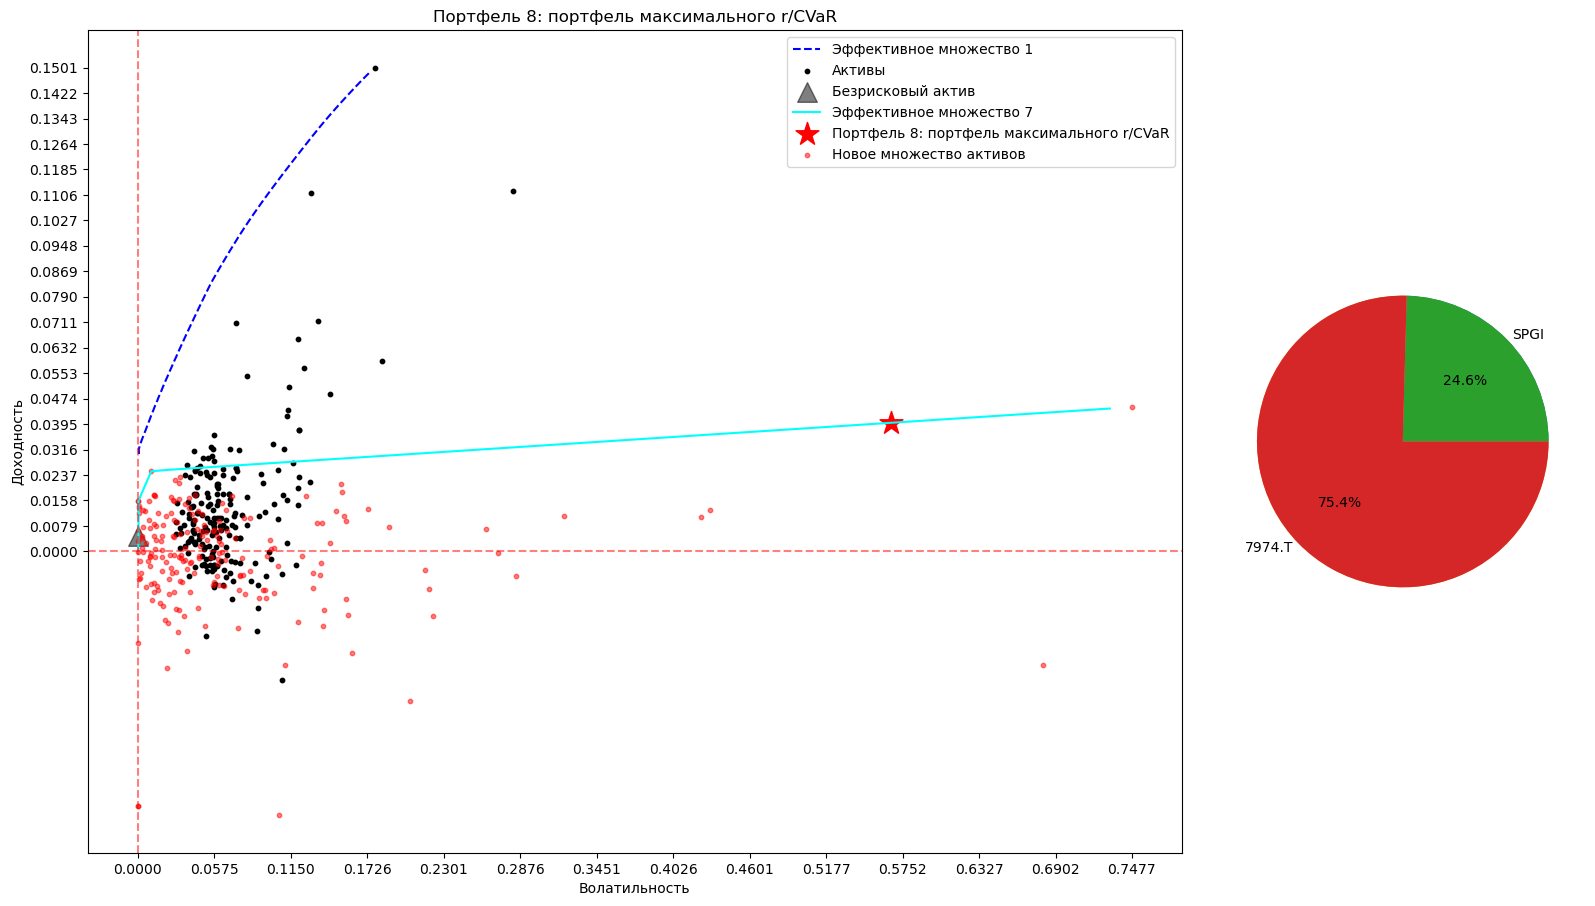

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 9), gridspec_kw={'width_ratios': [3, 1]})

#Efficient frontier 1
ax1.plot(ww1[1], ww1[0], color='blue', linestyle='--')

#Assets
ax1.scatter(np.sqrt(np.diag(cov_m_start)), mu_start, color='black', s=10)

#Risk Free asset
ax1.scatter(0, r_f, marker="^", color='black', s=200, alpha=0.5)

#Efficient frontier 2
ax1.plot(ww14[1], ww14[0], color='aqua')

#Min VaR portfolio
ax1.scatter(ww15[1], ww15[0], marker='*', color='red', s=300, zorder=-1)
ax1.scatter(np.sqrt(np.diag(cov_rcvar)), mu_rcvar, color='red', s=10, alpha=0.5)

#X,Y axes
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)   
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)

#
ax1.legend(['Эффективное множество 1'
           , 'Активы'
           , 'Безрисковый актив'
           , 'Эффективное множество 7'
           , 'Портфель 8: портфель максимального r/CVaR'
           , 'Новое множество активов'])


ax1.set_xlabel("Волатильность")
ax1.set_ylabel("Доходность")
ax1.set_title("Портфель 8: портфель максимального r/CVaR")

ax1.set_xticks(ticks=np.linspace(0
                                 , max(
                                     max(np.sqrt(np.diag(cov_rcvar))), max(np.sqrt(np.diag(cov_m_start))) )
                                 , num=14))

ax1.set_yticks(ticks=np.linspace(0, max( 
                                        max(mu_rcvar) , max(mu_start) )
                                , num=20))


#clear_output(wait=True)

#Portfolio bar

portfolio = zip(ww15[2], mu_start.index)
portfolio = list(filter(lambda s: s[0] > 0, portfolio))
values = [i[0] for i in portfolio]
labels = [i[1] for i in portfolio]

fig.tight_layout(pad=0.5)

wedges, autotexts = ax2.pie(values, textprops=dict(color="w"))

plt.setp(autotexts, size=10, weight="bold")

ax2.pie(values
       , labels=labels
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , labeldistance=1.05)


plt.show()